In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from AQUA_general import AQUA
from batchAQUA_general import batchAQUA
from plotting_functions import *


In [2]:
# RS neuron parameter dict
RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
     'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.01, 'f': 8.0, 'tau': 0.5}    # Class 1

x_start = np.array([-65, 0, 0])
t_start = 0.

In [3]:
neuron_RS = AQUA(RS)
neuron_RS.Initialise(x_start, t_start)

In [4]:
T = 2000
dt = 0.01
N_iter = int(T/dt)

I_inj = 100 * np.ones(N_iter)

X_RS, T_RS, RS_spikes = neuron_RS.update_RK2(dt, N_iter, I_inj)

print(RS_spikes)



100%|██████████| 199999/199999 [00:02<00:00, 79264.28it/s]

[  52.06  116.72  181.51  244.74  307.2   369.22  430.95  492.54  554.03
  615.47  676.87  738.27  799.65  861.02  922.39  983.76 1045.12 1106.49
 1167.86 1229.22 1290.57 1351.93 1413.3  1474.66 1536.04 1597.39 1658.76
 1720.11 1781.48 1842.85 1904.2  1965.58]


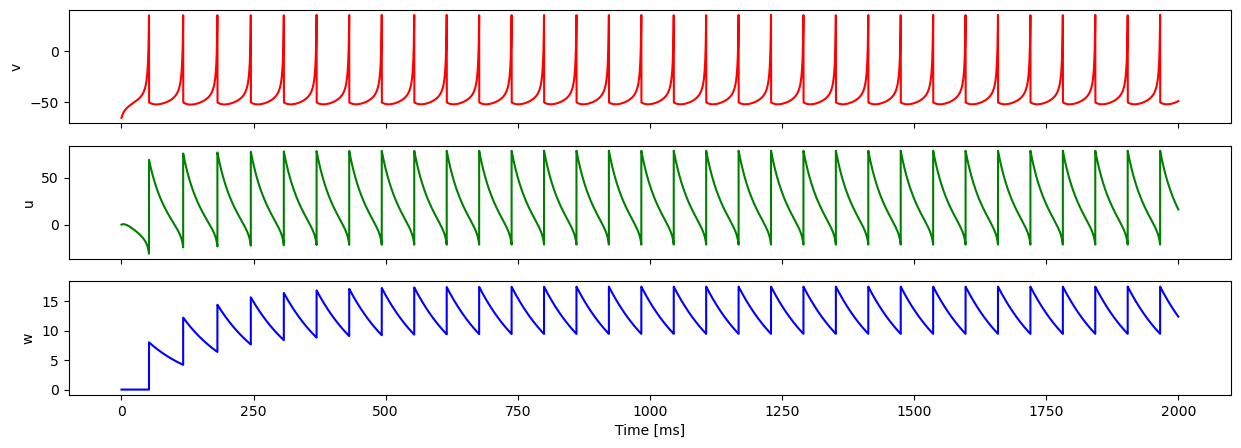

In [5]:
fig, ax = plot_membrane_variables(X_RS, T_RS)

100%|██████████| 399999/399999 [00:05<00:00, 75847.53it/s]


[  52.06        116.72        181.51        244.745       307.21
  369.22        430.975       492.575       554.08        615.54
  676.95        738.35        799.745       861.12        922.49
  983.87       1045.24       1106.61       1167.985      1229.36
 1290.735      1352.10000001 1413.47500001 1474.84000001 1536.21500001
 1597.59000001 1658.96500001 1720.33000001 1781.70000002 1843.07000002
 1904.43500002 1965.80000002]


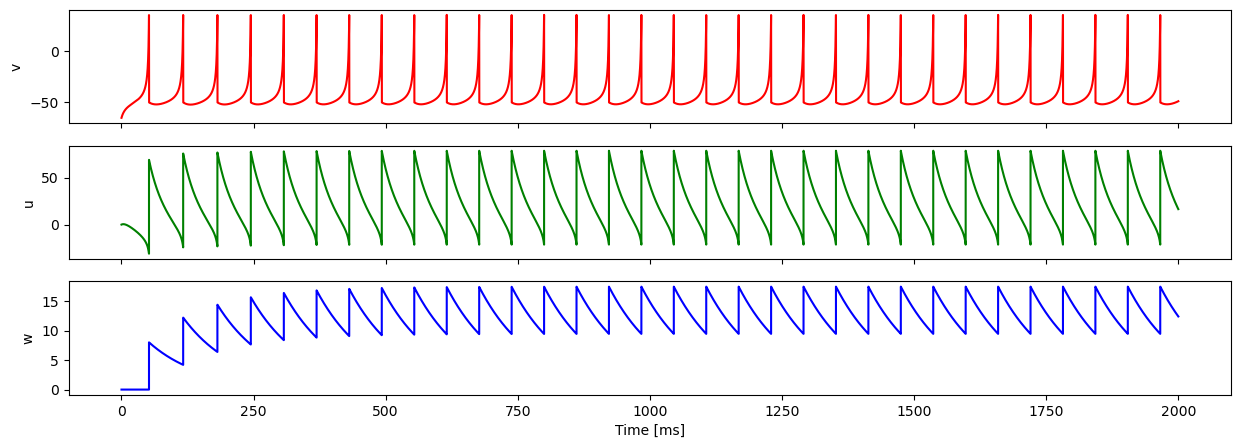

In [6]:
neuron_RS = AQUA(RS)
neuron_RS.Initialise(x_start, t_start)

T = 2000
dt = 0.005
N_iter = int(T/dt)

I_inj = 100 * np.ones(N_iter)

X_RS, T_RS, RS_spikes = neuron_RS.update_RK2(dt, N_iter, I_inj)

fig, ax = plot_membrane_variables(X_RS, T_RS)

print(RS_spikes)

100%|██████████| 199999/199999 [00:02<00:00, 74425.98it/s]


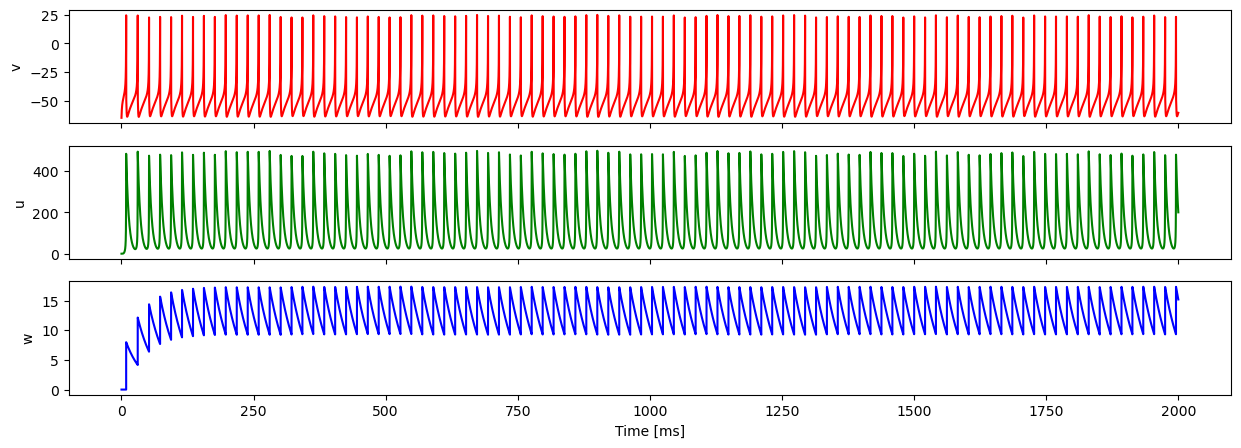

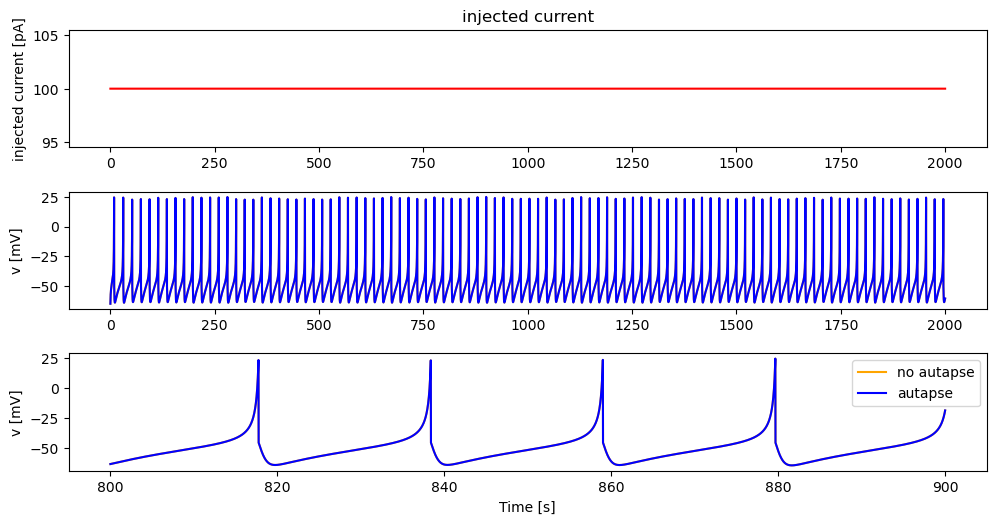

In [7]:
# FS neuron parameters
FS = {'name': 'FS', 'C': 20, 'k': 1, 'v_r': -55, 'v_t': -40, 'v_peak': 25,
     'a': 0.2, 'b': -2, 'c': -45, 'd': 0, 'e': 0.03, 'f': 8.0, 'tau': 0.5}    # Class 1

x_start = np.array([-65, 0, 0])
t_start = 0.

neuron_FS = AQUA(FS)
neuron_FS.Initialise(x_start, t_start)

T = 2000
dt = 0.01
N_iter = int(T/dt)

I_inj = 100 * np.ones(N_iter)

X, T, FS_spikes = neuron_FS.update_RK2(dt, N_iter, I_inj)

fig, ax = plot_membrane_variables(X, T)

x_start = np.array([-65, 0, 0])
t_start = 0.

neuron_FS = AQUA(FS)
neuron_FS.Initialise(x_start, t_start)

T = 2000
dt = 0.01
N_iter = int(T/dt)

I_inj = 100 * np.ones(N_iter)

X1, T1, FS_spikes1 = neuron_FS.update_RK2(dt, N_iter, I_inj)

#fig, ax = plot_membrane_variables(X, T)

fig, ax = compare_trains(X[0, :], X1[0, :], T1, I_inj, indices = range(80000, 90000))

In [8]:
N_models = 10
param_list = []
x_ini = np.zeros((N_models, 3))
t_ini = np.zeros(N_models)

T = 2000
dt = 0.005
N_iter = int(T/dt)

x_start = np.array([-65, 0, 0])
t_start = 0.

# create parameter list and initial conditions
for i in range(N_models):
    if i < 5:
        param_list.append(RS)
    else:
        param_list.append(FS)

    x_ini[i] = x_start
    t_ini[i] = t_start

# injected currents, identical for each neuron.
I_inj = 100 * np.ones((N_models, N_iter))


batch = batchAQUA(param_list)
batch.Initialise(x_ini, t_ini)

X, T, spikes = batch.update_batch(dt, N_iter, I_inj)



100%|██████████| 399999/399999 [01:24<00:00, 4759.49it/s]


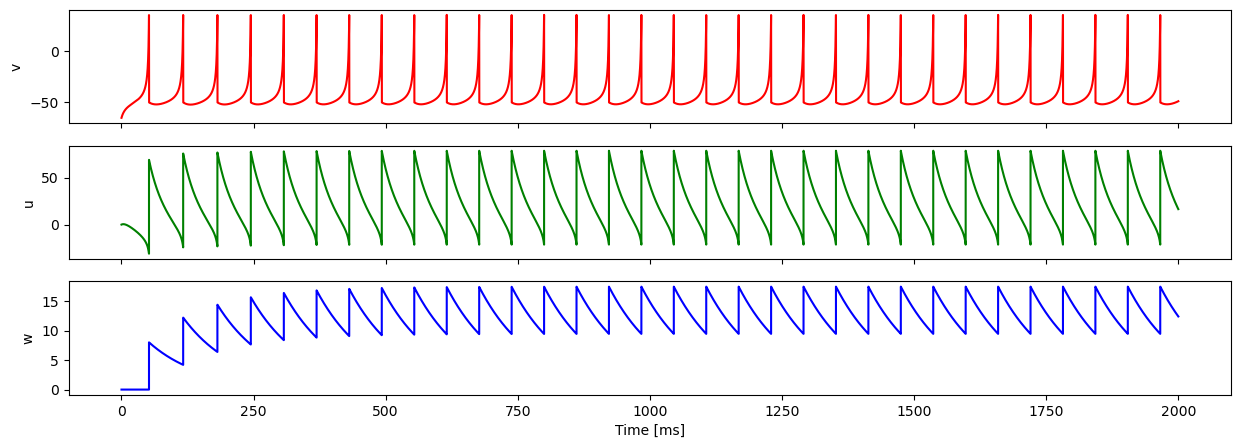

In [9]:
fig, ax = plot_membrane_variables(X[0, :], T)


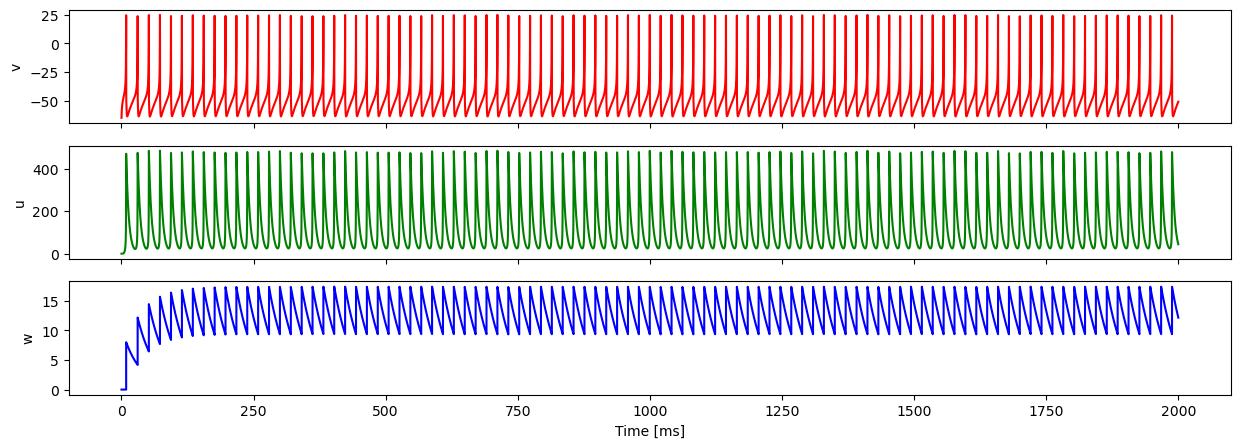

In [10]:
fig, ax = plot_membrane_variables(X[6], T)


In [11]:
print("Are the batch and normal models equivalent?")
print((spikes[0][~np.isnan(spikes[0])] == RS_spikes).all())
params = batch.get_params(0)
print(params)
print(spikes[0][~np.isnan(spikes[0])]) # batch spikes
print(RS_spikes)    # single neuron spikes


Are the batch and normal models equivalent?
True
{'name': 'RS', 'k': 0.7, 'C': 100, 'v_r': -60, 'v_t': -40, 'v_peak': 35, 'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.01, 'f': 8.0, 'tau': 0.5}
[  52.06        116.72        181.51        244.745       307.21
  369.22        430.975       492.575       554.08        615.54
  676.95        738.35        799.745       861.12        922.49
  983.87       1045.24       1106.61       1167.985      1229.36
 1290.735      1352.10000001 1413.47500001 1474.84000001 1536.21500001
 1597.59000001 1658.96500001 1720.33000001 1781.70000002 1843.07000002
 1904.43500002 1965.80000002]
[  52.06        116.72        181.51        244.745       307.21
  369.22        430.975       492.575       554.08        615.54
  676.95        738.35        799.745       861.12        922.49
  983.87       1045.24       1106.61       1167.985      1229.36
 1290.735      1352.10000001 1413.47500001 1474.84000001 1536.21500001
 1597.59000001 1658.96500001 1720.33000001

In [12]:
params = batch.get_params(6)
print(params)
print(spikes[6][~np.isnan(spikes[6])])
print(FS_spikes)

{'name': 'FS', 'k': 1.0, 'C': 20, 'v_r': -55, 'v_t': -40, 'v_peak': 25, 'a': 0.2, 'b': -2, 'c': -45, 'd': 0, 'e': 0.03, 'f': 8.0, 'tau': 0.5}
[   8.835        30.57         51.79         72.815        93.685
  114.355       135.          155.665       176.28        196.865
  217.425       238.          258.6         279.2         299.82
  320.465       341.03        361.56        382.085       402.61
  423.185       443.825       464.4         484.99        505.555
  526.12        546.695       567.235       587.775       608.405
  628.965       649.605       670.22        690.77        711.42
  732.085       752.685       773.235       793.81        814.42
  835.015       855.545       876.17        896.755       917.36
  937.93        958.51        979.145       999.74       1020.395
 1040.97       1061.625      1082.235      1102.82       1123.42
 1143.995      1164.585      1185.18       1205.775      1226.34
 1246.93       1267.55       1288.1        1308.72500001 1329.25500001
 1

100%|██████████| 199999/199999 [00:02<00:00, 78936.23it/s]


[  52.06  116.66  181.43  244.65  307.07  369.05  430.79  492.35  553.84
  615.27  676.68  738.04  799.42  860.77  922.11  983.46 1044.81 1106.15
 1167.49 1228.83 1290.19 1351.53 1412.87 1474.21 1535.55 1596.9  1658.25
 1719.61 1780.96 1842.29 1903.64 1964.98]
[-51.59526405  58.71868158  15.95372729]


100%|██████████| 199999/199999 [00:02<00:00, 79048.20it/s]


[ 553.84        615.27        676.68        738.04        799.42
  860.77        922.11        983.46       1044.81       1106.15
 1167.49       1228.83       1290.19       1351.53       1412.87
 1474.21       1535.55       1596.9        1658.25       1719.61
 1780.96       1842.29       1903.64       1964.98       2026.33
 2087.67       2149.03       2210.37       2271.72       2333.08
 2394.42000001 2455.78000001]


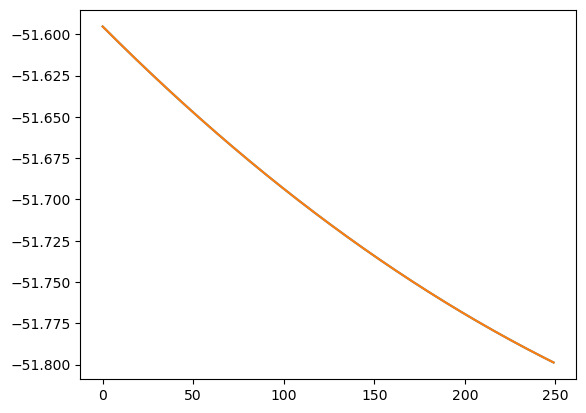

In [13]:
## Test how the model works if you initialise from a point in a previous run.

# RS neuron parameter dict
RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
     'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.01, 'f': 8.0, 'tau': 0.}    # Class 1

x_start = np.array([-65, 0, 0])
t_start = 0.

neuron_RS = AQUA(RS)
neuron_RS.Initialise(x_start, t_start)

T = 2000
dt = 0.01
N_iter = int(T/dt)

I_inj = 100 * np.ones(N_iter)

X_RS, T_RS, RS_spikes = neuron_RS.update_RK2(dt, N_iter, I_inj)

print(RS_spikes)

idx = 50000
t_ini = T_RS[idx]
x_ini = X_RS[:, idx]
print(x_ini)
w_prev = X_RS[2, idx - int(RS["tau"]/dt): idx]

neuron_RS.Initialise(x_ini, t_ini)
X, T, spikes = neuron_RS.update_RK2(dt, N_iter, I_inj, w_prev)

plt.plot(X_RS[0, idx:idx+250])
plt.plot(X[0, :250])

print(spikes)

  0%|          | 0/199999 [00:00<?, ?it/s]

100%|██████████| 199999/199999 [00:35<00:00, 5659.21it/s]


[ 554.03  615.47  676.87  738.27  799.65  861.02  922.39  983.76 1045.12
 1106.49 1167.86 1229.22 1290.57 1351.93 1413.3  1474.66 1536.04 1597.39
 1658.76 1720.11 1781.48 1842.85 1904.2  1965.58]


100%|██████████| 199999/199999 [00:35<00:00, 5662.11it/s]


[[ 554.03        615.47        676.87        738.27        799.65
   861.02        922.39        983.76       1045.12       1106.48
  1167.85       1229.22       1290.59       1351.96       1413.31
  1474.67       1536.04       1597.4        1658.76       1720.11
  1781.47       1842.85       1904.2        1965.56       2026.91
  2088.28       2149.65       2211.03       2272.39       2333.75
  2395.10000001 2456.47000001]
 [ 554.03        615.47        676.87        738.27        799.65
   861.02        922.39        983.76       1045.12       1106.48
  1167.85       1229.22       1290.59       1351.96       1413.31
  1474.67       1536.04       1597.4        1658.76       1720.11
  1781.47       1842.85       1904.2        1965.56       2026.91
  2088.28       2149.65       2211.03       2272.39       2333.75
  2395.10000001 2456.47000001]]


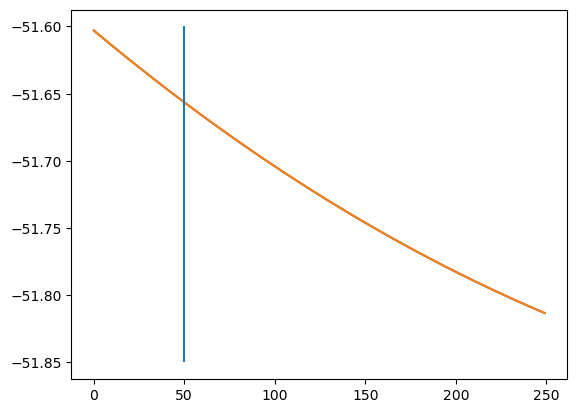

In [ ]:
## Test how the batch model works if you initialise from a point in a previous run.

# RS neuron parameter dict
RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
     'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.01, 'f': 8.0, 'tau': 0.5}    # Class 1

#RS2 = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
#     'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.01, 'f': 8.0, 'tau': 0.7}    # Class 1

x_start = np.array([[-65, 0, 0],
                    [-65, 0, 0]])
t_start = np.array([0., 0.])

params = [RS, RS]
batch = batchAQUA(params)
batch.Initialise(x_start, t_start)

T = 2000
dt = 0.01
N_iter = int(T/dt)

I_inj = 100 * np.ones((2, N_iter))



X_RS, T_RS, RS_spikes = batch.update_batch(dt, N_iter, I_inj)

print(RS_spikes[0][RS_spikes[0] > 554])

idx = 50000
t_ini = np.array([T_RS[idx], T_RS[idx]])
x_ini = np.array([X_RS[0, :, idx], X_RS[0, :, idx]])


w_prev = np.array([X_RS[n, 2, idx - int(tau/dt): idx] for n, tau in enumerate(batch.tau)])

batch.Initialise(x_ini, t_ini)
X, T, spikes = batch.update_batch(dt, N_iter, I_inj, w_prev)

plt.plot(X_RS[0, 0, idx:idx+250])
plt.plot(X[0, 0, :250])

print(spikes)

In [19]:
arr = np.array([1, 2, 3])

print(np.nonzero(arr <= 2))

print(np.nonzero(~(arr <= 2)))




(array([0, 1], dtype=int64),)
(array([2], dtype=int64),)
